In [3]:
import numpy as np
import pandas as pd

# import test and train dataset

In [5]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

# perform EDA

In [8]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [10]:
train_df.shape

(4209, 378)

In [11]:
test_df.shape

(4209, 377)

# TASK:If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [12]:
Colwithzerovariance=[]
for i , val in enumerate(list(train_df.columns)): 
    if(train_df[val].dtype in [float,int]):
        
        if(train_df[val].var()==0): 
            print(train_df.columns[i]) 
            Colwithzerovariance.append(train_df.columns[i])

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X347


In [13]:
train_df.drop(Colwithzerovariance,axis=1,inplace=True)

In [14]:
test_df.drop(Colwithzerovariance,axis=1,inplace=True)

In [15]:
train_df.shape

(4209, 366)

In [16]:
test_df.shape

(4209, 365)

# TASK:Check for null and unique values for test and train sets.

In [77]:
train_df.isnull().sum().sum()

0

In [18]:
test_df.isnull().sum().sum()

0

In [85]:
 train_df.nunique()

ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 366, dtype: int64

In [86]:
test_df.nunique()

ID      4209
X0        49
X1        27
X2        45
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 365, dtype: int64

# TASK: Apply label encoder.

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
labdelencoder = LabelEncoder()

In [21]:
for i , val in enumerate(list(train_df.columns)): 
    if(train_df[val].dtype in [object]):
        train_df[val]=labdelencoder.fit_transform(train_df[val])

In [22]:
for i , val in enumerate(list(test_df.columns)): 
    if(test_df[val].dtype in [object]):
        test_df[val]=labdelencoder.fit_transform(test_df[val])

In [23]:
train_df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,8,20,16,2,3,0,3,16,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,31,16,40,3,3,0,7,7,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,8,23,38,0,3,0,6,4,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,9,19,25,5,3,0,11,20,...,0,0,0,0,0,0,0,0,0,0


In [24]:
test_df

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,6,9,17,5,3,1,9,4,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,42,1,8,3,3,1,9,24,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,47,23,17,5,3,1,3,22,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,7,23,17,0,3,1,2,16,0,...,0,0,1,0,0,0,0,0,0,0


# TASK: Perform dimensionality reduction.

In [60]:
features=train_df.iloc[:,2:366].values
label=train_df['y']

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = StandardScaler().fit_transform(features)

# Choosing the number of components

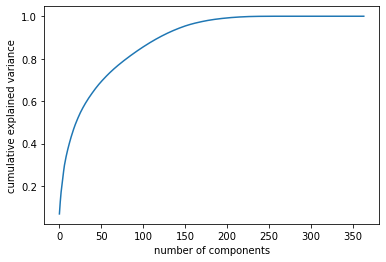

In [62]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA().fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# the 150 components contain approximately 95% of the variance

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=175)
pca.fit(features,label)
features = pca.transform(features)
features

array([[ 1.22544667e+01, -2.94420951e+00, -9.57849872e-01, ...,
        -3.26165822e-01,  4.71410296e-01,  1.71116338e-01],
       [-1.02545670e-01,  3.66061641e-01,  9.97224047e-01, ...,
        -5.01976151e-01,  8.46666351e-02, -4.03500314e-03],
       [ 1.02783182e+01,  2.11049278e+01, -5.01329942e+00, ...,
        -4.59377601e-01, -2.44880127e-01, -2.10940951e-01],
       ...,
       [ 4.36968281e-01,  8.97529347e-01,  3.44522225e+00, ...,
        -1.46818115e-01, -1.00925546e-01,  1.39136394e-01],
       [-1.34167187e+00,  5.89252655e-01, -1.09654887e-01, ...,
        -7.24782367e-02,  1.66043072e-01, -6.48459263e-01],
       [-2.16821336e+00, -1.06043018e+00, -2.88075121e-01, ...,
         4.98886381e-01, -2.74704310e-02, -4.54815876e-01]])

# Task:Predict your test_df values using XGBoost.

In [64]:
#!pip install xgboost
import xgboost

In [65]:
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [69]:
X_train,X_test,y_train,y_test=train_test_split(features,
                                                  label,
                                                  test_size=0.2,
                                                  random_state=82)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3367, 175)
(842, 175)
(3367,)
(842,)


In [89]:
from xgboost import XGBRegressor
classifier = XGBRegressor() 

    
classifier.fit(X_train,y_train)
    
train=classifier.score(X_train,y_train)
test=classifier.score(X_test,y_test)
        
    
print("Train Score:",train)
print("Test Score:",test)

Train Score: 0.9703882190845339
Test Score: 0.5142277216739501


# Test Score: 0.5142277216739501

In [72]:
y_pred = classifier.predict(X_test)

In [74]:
from sklearn import metrics
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  6.249117790820196
Mean Sq  Error MSE      :  77.5686868914197
Root Mean Sq Error RMSE :  8.807308720115339
r2 value                :  0.5142277216739501
